# Variant Allele Frequency density plots

### This code is made for plotting the variant allele frequency of mutations and distinguish clonal and subclonal mutations
#### Input: MAF files
#### Output: PDF plots

### Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Load data (MAF files)

In [3]:
# Add as many maf files as required

c1 = pd.read_csv('../0.Data/clone1.maf', sep='\t', skiprows=0)
c2 = pd.read_csv('../0.Data/clone2.maf', sep='\t', skiprows=0)
parental = pd.read_csv('../0.Data/Parental.maf', sep='\t', skiprows=0)
uvb = pd.read_csv('../0.Data/UVB.maf', sep='\t', skiprows=0)

In [4]:
c1.columns.values

array(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build',
       'Chromosome', 'Start_position', 'End_position', 'Strand',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 'Tumor_Sample_UUID', 'Matched_Norm_Sample_UUID',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'Exon_Number',
       't_depth', 't_ref_count', 't_alt_count', 't_vaf', 'n_depth',
       'n_ref_count', 'n_alt_count', 'all_effects', 'Allele', 'Gene',
       'Feature', 'F

### Keep only exonic mutations (NOTE: Skip this to show small peak at 0.5)

In [5]:
# exonic mutations
mut_types = ['Missense_Mutation','Silent','Nonstop_Mutation',
             'Nonsense_Mutation','In_Frame_Ins','Frame_Shift_Ins',
             'In_Frame_Del','Frame_Shift_Del']

c1 = c1[c1.Variant_Classification.isin(mut_types)]
c2 = c2[c2.Variant_Classification.isin(mut_types)]
parental = parental[parental.Variant_Classification.isin(mut_types)]
uvb = uvb[uvb.Variant_Classification.isin(mut_types)]

### Keep only genes with 10 or more reads

In [6]:
c1 = c1[c1['t_depth'] >= 10]
c2 = c2[c2['t_depth'] >= 10]
parental = parental[parental['t_depth'] >= 10]
uvb = uvb[uvb['t_depth'] >= 10]

### Plot VAF densities

In [7]:
mafs = [c1, c2, parental, uvb]

In [8]:
vafs = {}
for i, maf in enumerate(mafs):
    maf = maf[maf.Variant_Classification.isin(mut_types)] # Comment this out to show peak at 0.5
    vaf = [maf['t_vaf'][j] for j in maf.index if maf['t_depth'][j] >= 10]
    vafs[i+1] = pd.Series([v for v in vaf if math.isnan(v) is False])

In [9]:
df_toplot = pd.DataFrame.from_dict(vafs) # PASS + 10

### Linear densities

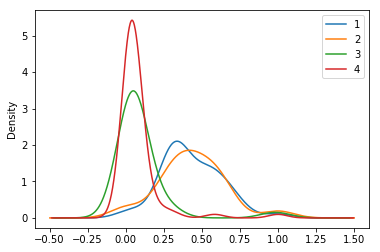

In [10]:
ax = df_toplot.plot(kind='kde')

In [11]:
df_toplot.head()

,1,2,3,4
0,0.540000,0.666667,0.031390,0.011583
1,0.588235,0.212121,0.057971,0.058140
2,0.333333,0.294118,0.024561,0.049020
3,0.260870,0.304000,0.032710,0.204301
4,0.024691,0.375000,0.037464,0.020492


In [12]:
fig = ax.get_figure()

In [ ]:
fig.savefig('Linear_VAF_densitites.pdf', bbox_inches='tight')

### Log2 densities

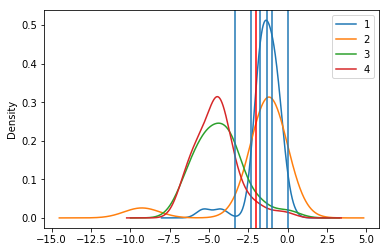

In [13]:
ax2 = df_toplot.apply(np.log2).plot(kind='kde')
ax2 = plt.axvline(x=np.log2(1))
ax2 = plt.axvline(x=np.log2(0.5))
ax2 = plt.axvline(x=np.log2(0.4))
ax2 = plt.axvline(x=np.log2(0.3))
ax2 = plt.axvline(x=np.log2(0.25), c='r')
ax2 = plt.axvline(x=np.log2(0.2))
ax2 = plt.axvline(x=np.log2(0.1))

In [14]:
fig2 = ax2.get_figure()

In [ ]:
fig2.savefig('/Users/jimene01/Downloads/to_Alejandro/Log2_VAF_densitites_all.pdf', bbox_inches='tight')

## Fraction of "clonal" and "subclonal" mutations

In [17]:
df_toplot.head()

,1,2,3,4
0,0.540000,0.666667,0.031390,0.011583
1,0.588235,0.212121,0.057971,0.058140
2,0.333333,0.294118,0.024561,0.049020
3,0.260870,0.304000,0.032710,0.204301
4,0.024691,0.375000,0.037464,0.020492


In [15]:
(df_toplot[1].dropna() > 0.25).value_counts(normalize=True)

True     0.9
False    0.1
Name: 1, dtype: float64

In [16]:
(df_toplot[2].dropna() > 0.25).value_counts(normalize=True)

True     0.829268
False    0.170732
Name: 2, dtype: float64

In [18]:
(df_toplot[3].dropna() > 0.25).value_counts(normalize=True)

False    0.888889
True     0.111111
Name: 3, dtype: float64

In [19]:
(df_toplot[4].dropna() > 0.25).value_counts(normalize=True)

False    0.940299
True     0.059701
Name: 4, dtype: float64

### End of script